## Oscilador harmônico

### Considerando a EDO do oscilador harmônico: $\frac{d^2x}{dt^2}=-\omega_0^2x-b\frac{dx}{dt}$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


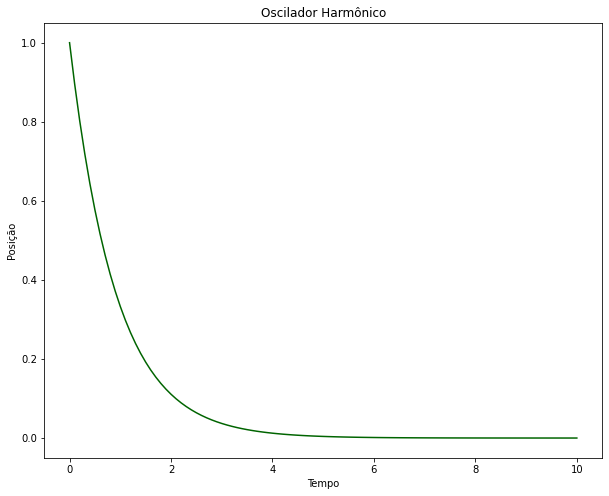

In [10]:
  def runge_kutta(f, t0, tn, y0, h):
      n = int((tn - t0) / h) + 1
      t = np.linspace(t0, tn, n)
      y = np.zeros_like(t)
      y[0] = y0
      
      for i in range(1, n):
          k1 = h * f(t[i-1], y[i-1])
          k2 = h * f(t[i-1] + h/2, y[i-1] + k1/2)
          k3 = h * f(t[i-1] + h/2, y[i-1] + k2/2)
          k4 = h * f(t[i-1] + h, y[i-1] + k3)
          
          y[i] = y[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
      
      return t, y
  
  def harmonic_oscillator(t, x):
      m = 1
      b = 0.1
      k = 1
      return -(b/m) * x - (k/m) * x
  
  t, x = runge_kutta(harmonic_oscillator, 0, 10, 1, 0.1)
  

  fig = plt.figure(figsize=(10, 8))
  plt.plot(t, x, color='darkgreen')
  plt.xlabel('Tempo')
  plt.ylabel('Posição')
  plt.title('Oscilador Harmônico')
  plt.grid(False)
  plt.show()

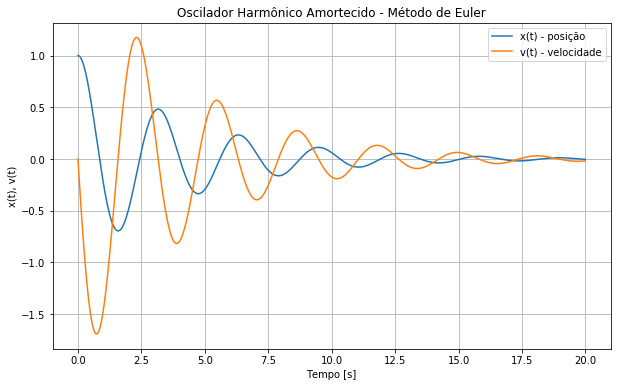

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sistema
omega0 = 2.0      # Frequência natural
b = 0.5           # Coeficiente de amortecimento
h = 0.01          # Passo de tempo
T = 20            # Tempo total de simulação

# Condições iniciais
x0 = 1.0          # Posição inicial
v0 = 0.0          # Velocidade inicial

# Vetor de tempo
t = np.arange(0, T, h)
n = len(t)

# Inicialização dos vetores de solução
x = np.zeros(n)
v = np.zeros(n)

# Condições iniciais
x[0] = x0
v[0] = v0

# Integração pelo método de Euler
for i in range(n - 1):
    x[i + 1] = x[i] + h * v[i]
    v[i + 1] = v[i] + h * (-omega0**2 * x[i] - b * v[i])

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='x(t) - posição')
plt.plot(t, v, label='v(t) - velocidade')
plt.title('Oscilador Harmônico Amortecido - Método de Euler')
plt.xlabel('Tempo [s]')
plt.ylabel('x(t), v(t)')
plt.grid(True)
plt.legend()
plt.show()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7597804c8f10>,
      dtype=object)

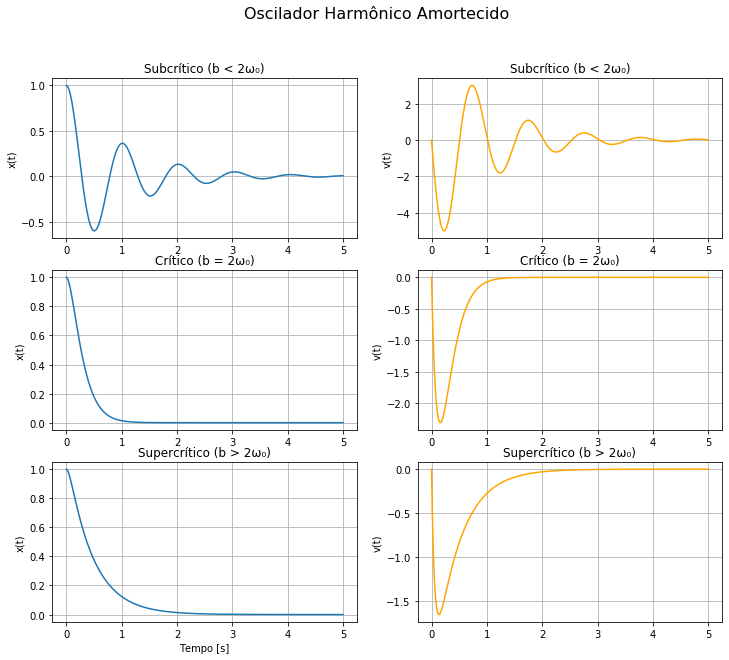

In [ ]:

# Frequência natural (rad/s)
omega0 = 2 * np.pi

# Tempo de simulação
T_max = 5
t_eval = np.linspace(0, T_max, 1000)

# Condições iniciais: posição e velocidade
x0 = 1.0
v0 = 0.0
y0 = [x0, v0]

# Sistema de EDOs
def sistema(t, y, omega0, b):
    x, v = y
    dxdt = v
    dvdt = -omega0**2 * x - b * v
    return [dxdt, dvdt]

# Amortecimentos: subcrítico, crítico, supercrítico
regimes = {
    'Subcrítico (b < 2ω₀)': 2.0,
    'Crítico (b = 2ω₀)': 2 * omega0,
    'Supercrítico (b > 2ω₀)': 20.0
}

# Plots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Oscilador Harmônico Amortecido", fontsize=16)

for i, (regime, b) in enumerate(regimes.items()):
    sol = solve_ivp(sistema, [0, T_max], y0, args=(omega0, b), t_eval=t_eval, method='RK45')
    
    t = sol.t
    x = sol.y[0]
    v = sol.y[1]
    
    axs[i][0].plot(t, x, label='x(t)')
    axs[i][1].plot(t, v, label='v(t)', color='orange')
    
    axs[i][0].set_ylabel('x(t)')
    axs[i][1].set_ylabel('v(t)')
    axs[i][0].set_title(regime)
    axs[i][1].set_title(regime)
    axs[i][0].grid(True)
    axs[i][1].grid(True)

# Eixos X
axs[2][0].set_xlabel('Tempo [s]')
axs[2]


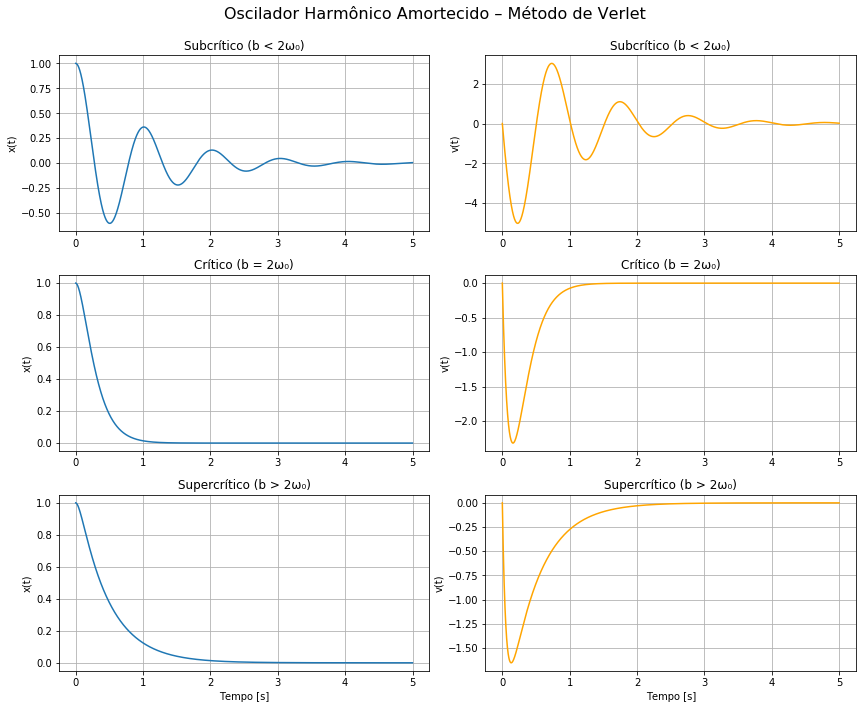

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sistema
omega0 = 2 * np.pi   # Frequência natural (rad/s)
T_max = 5            # Tempo total
h = 0.001            # Passo de tempo
t = np.arange(0, T_max, h)
n = len(t)

# Condições iniciais
x0 = 1.0
v0 = 0.0

# Regimes de amortecimento
regimes = {
    'Subcrítico (b < 2ω₀)': 2.0,
    'Crítico (b = 2ω₀)': 2 * omega0,
    'Supercrítico (b > 2ω₀)': 20.0
}

# Função para rodar o método de Velocity Verlet
def velocity_verlet(b):
    x = np.zeros(n)
    v = np.zeros(n)
    a = np.zeros(n)

    # Condições iniciais
    x[0] = x0
    v[0] = v0
    a[0] = -omega0**2 * x[0] - b * v[0]

    for i in range(n - 1):
        x[i+1] = x[i] + v[i]*h + 0.5*a[i]*h**2
        a_next = -omega0**2 * x[i+1] - b * v[i]  # usa v[i] aqui!
        v[i+1] = v[i] + 0.5*(a[i] + a_next)*h
        a[i+1] = a_next

    return x, v

# Plot
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle("Oscilador Harmônico Amortecido – Método de Verlet", fontsize=16)

for i, (nome, b) in enumerate(regimes.items()):
    x, v = velocity_verlet(b)
    
    axs[i][0].plot(t, x, label='x(t)')
    axs[i][1].plot(t, v, label='v(t)', color='orange')

    axs[i][0].set_ylabel('x(t)')
    axs[i][1].set_ylabel('v(t)')
    axs[i][0].set_title(nome)
    axs[i][1].set_title(nome)
    axs[i][0].grid(True)
    axs[i][1].grid(True)

# Eixos X
axs[2][0].set_xlabel('Tempo [s]')
axs[2][1].set_xlabel('Tempo [s]')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
